**Final Project Title: Analysis of PIMA Indian Diabetes Dataset and Identifying its Determinants using Machine Learning techniques**

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Objective:**

First, I am performing various aspects of data analysis, including data preprocessing, exploratory data analysis, correlation analysis, feature importance evaluation, and building and evaluating different machine learning models (Decision Tree, Logistic Regression, and Random Forest) for predicting diabetes outcome.

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Exploration:**

Reading the diabetes dataset from a CSV file using pandas. Then, printing the first few rows, shape, columns, and summary statistics of the dataset.
Also, checking for missing values and replaces 0 values with NaN for certain columns. Next, I am performing imputation of missing values using the KNN imputer and fills the remaining missing values with the mean or median.

Note: Please upload the diabetes.csv file and then run this code.

In [ ]:
# Reading the CSV file
diabetes = pd.read_csv("diabetes.csv")

The data set contains 9 different diagnostic variables of diabetes which are detailed below:

Blood pressure- Diastolic blood pressure (mm Hg),

Age-Age (years),  

Insulin-synthesis of the diabetes mellitus history,  

Glucose- Plasma glucose concentration 2 hours in an oral glucose tolerance test

Pregnancies-Number of times pregnant

Skin thickness- Triceps skin fold thickness (mm),

BMI- Body mass index (weight in kg/(height in m)^2),

Diabetes pedigree function- synthesis of the diabetes mellitus history and

Outcome- 0(non-diabetic) &1(diabetic)





In [ ]:
# Printing the first five rows
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Printing the shape of the DataFrame
print(diabetes.shape)

(768, 9)


In [ ]:
# Printing the coloumns
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Printing the structure of the DataFrame
print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Printing the summary statistics
print(diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

**Data Preprocessing:**

In [ ]:
# Counting the number of missing values
print(diabetes.isna().sum().sum())

0


In [ ]:
# Replacing 0 values with NaN for certain columns
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[cols] = diabetes[cols].replace(0, np.nan)

In [ ]:
# Counting the number of missing values after replacement
print(diabetes.isna().sum().sum())
print(diabetes.isna().sum())

652
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Imputing missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
diabetes_imputed = pd.DataFrame(imputer.fit_transform(diabetes.drop('Outcome', axis=1)), columns=diabetes.drop('Outcome', axis=1).columns)
diabetes_imputed['Outcome'] = diabetes['Outcome']

In [ ]:
# Replacing missing values in the 'Insulin' column with mean and median
diabetes_imputed['Insulin'] = diabetes_imputed['Insulin'].fillna(diabetes_imputed['Insulin'].mean())
diabetes_imputed['Insulin'] = diabetes_imputed['Insulin'].fillna(diabetes_imputed['Insulin'].median())

In [ ]:
# Checking for missing values after imputation
print(diabetes_imputed.isna().sum().sum())

0


In [ ]:
diabetes.isnull().values.any()

True

In [ ]:
# Counting NaN values in all columns
nan_count = diabetes.isna().sum()

print(nan_count)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
diabetes['BMI'] = diabetes['BMI'].replace(np.NaN, diabetes['BMI'].mean())

In [ ]:
diabetes['Insulin'] = diabetes['Insulin'].replace(np.NaN, diabetes['Insulin'].mean())

In [ ]:
diabetes['Glucose'] = diabetes['Glucose'].replace(np.NaN, diabetes['Glucose'].mean())
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(np.NaN, diabetes['BloodPressure'].mean())
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(np.NaN, diabetes['SkinThickness'].mean())

In [ ]:
# Counting NaN values in all columns
nan_count = diabetes.isna().sum()

print(nan_count)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Data Visualization:**

Plotting boxplots to identify outliers in the dataset. Next, calculating and visualizing the correlation matrix and correlation heatmap. The, creating violin plots to visualize the distribution of each feature for diabetic and non-diabetic cases.

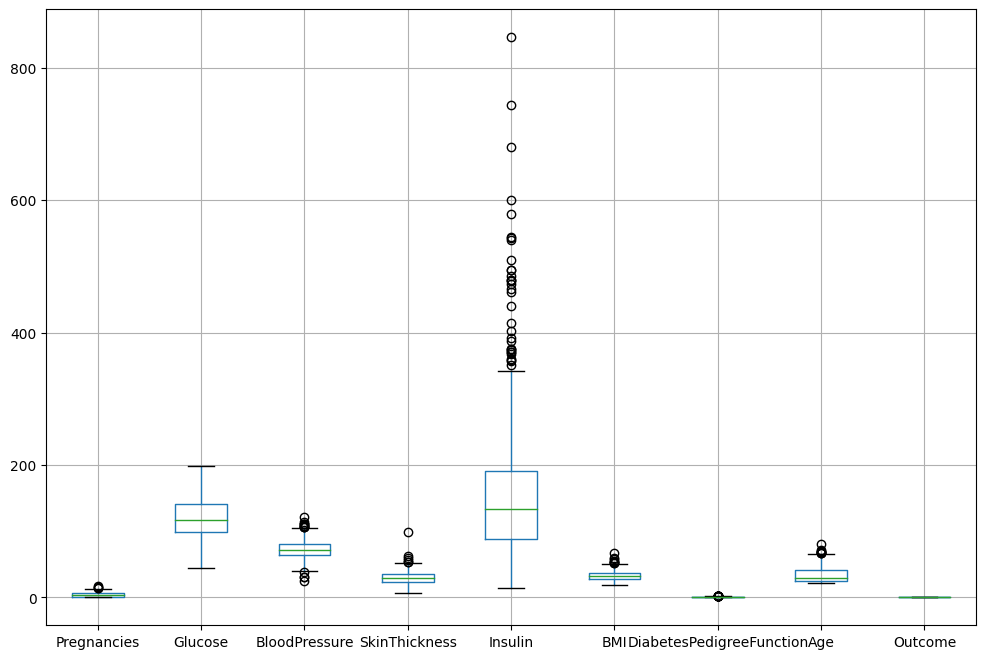

In [ ]:
# Plotting boxplots to identify outliers
diabetes_imputed.boxplot(figsize=(12, 8))
plt.show()

In [ ]:
# Calculating correlations between variables
corr = diabetes_imputed.drop('Outcome', axis=1).corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.131230       0.218491       0.102385   
Glucose                      0.131230  1.000000       0.232941       0.246496   
BloodPressure                0.218491  0.232941       1.000000       0.229487   
SkinThickness                0.102385  0.246496       0.229487       1.000000   
Insulin                      0.060400  0.628888       0.133291       0.243867   
BMI                          0.022852  0.238403       0.293077       0.638892   
DiabetesPedigreeFunction    -0.033523  0.139226       0.005479       0.113881   
Age                          0.544341  0.270115       0.337131       0.149947   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.060400  0.022852                 -0.033523   
Glucose                   0.628888  0.238403                  0.139226   
BloodPressure             0.133291  0.293077    

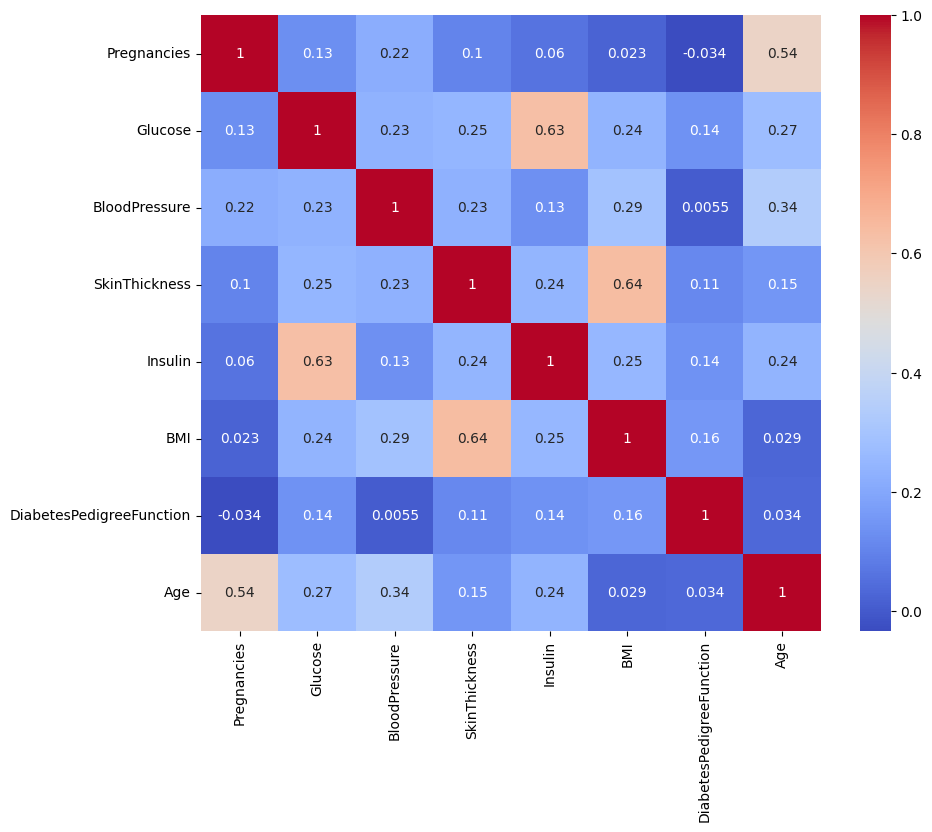

In [ ]:
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

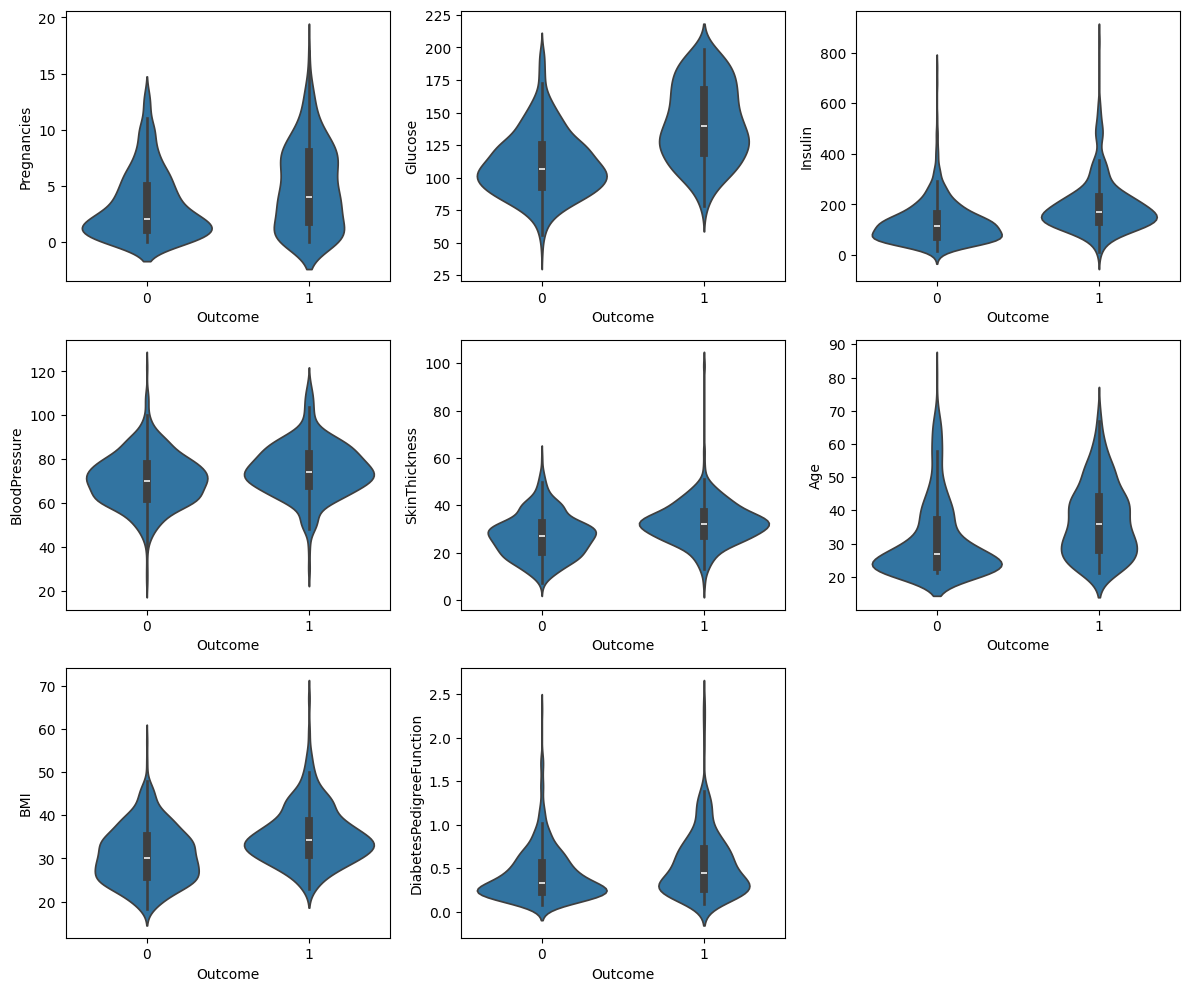

In [ ]:
# Plotting violin plots for each variable
plt.figure(figsize=(12, 10))
plt.subplot(3, 3, 1)
sns.violinplot(x='Outcome', y='Pregnancies', data=diabetes_imputed)
plt.subplot(3, 3, 2)
sns.violinplot(x='Outcome', y='Glucose', data=diabetes_imputed)
plt.subplot(3, 3, 3)
sns.violinplot(x='Outcome', y='Insulin', data=diabetes_imputed)
plt.subplot(3, 3, 4)
sns.violinplot(x='Outcome', y='BloodPressure', data=diabetes_imputed)
plt.subplot(3, 3, 5)
sns.violinplot(x='Outcome', y='SkinThickness', data=diabetes_imputed)
plt.subplot(3, 3, 6)
sns.violinplot(x='Outcome', y='Age', data=diabetes_imputed)
plt.subplot(3, 3, 7)
sns.violinplot(x='Outcome', y='BMI', data=diabetes_imputed)
plt.subplot(3, 3, 8)
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_imputed)
plt.tight_layout()
plt.show()

<Axes: >

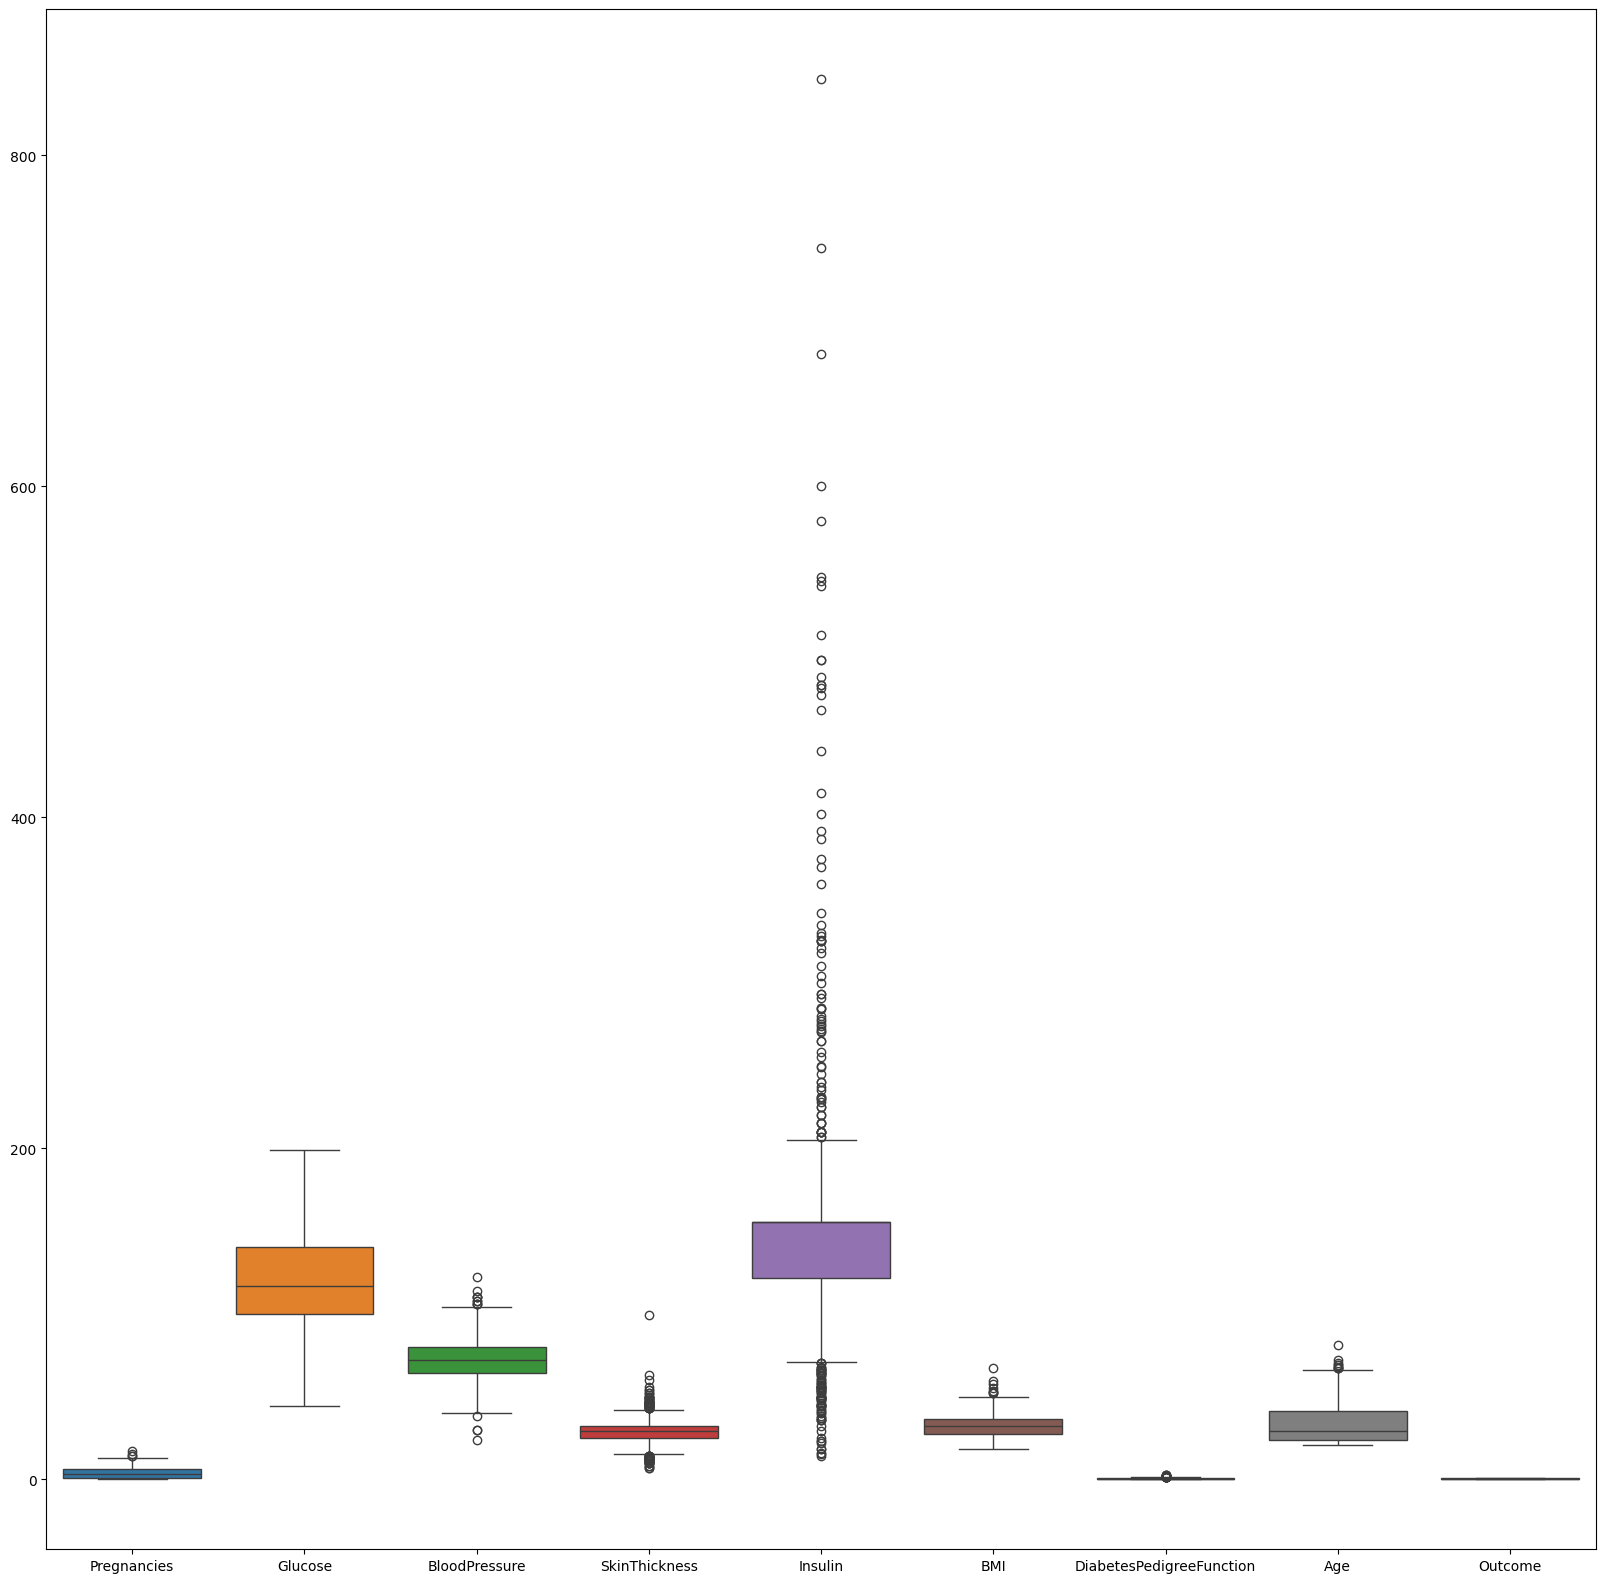

In [ ]:
# Plotting Boxplot
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = diabetes , ax = ax)

**Feature Selection and Predictive Modeling:**

In [ ]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

**Train and Test Split:**

Splitting the dataset into training and test sets.

In [ ]:
# Splitting the data into train and test sets
sample_size = int(2/3 * len(diabetes))
diabetes_train, diabetes_test = train_test_split(diabetes, train_size=sample_size, random_state=44)

**Decision Tree Classifier:**

Fitting a Decision Tree Classifier on the training data. Plotting the feature importances of the trained Decision Tree model.

In [ ]:
# Fitting a decision tree classifier
features = diabetes.drop('Outcome', axis=1).columns
X_train = diabetes_train[features]
y_train = diabetes_train['Outcome']

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

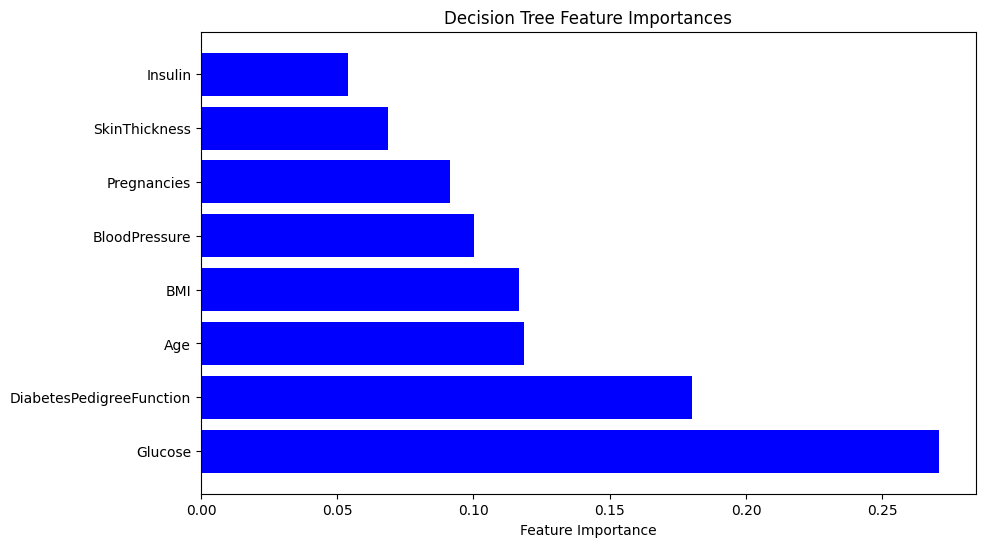

In [ ]:
# Plotting the feature importances
importances = dtree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

**Logistic Regression:**

Fitting a Logistic Regression model on the training data. Then, making predictions on the test set and calculates the accuracy, R-squared, and area under the ROC curve (AUC-ROC) scores. Finally, comparing the actual and predicted values for the test set.

In [ ]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
# Separating features and target for test set
X_test = diabetes_test[features]
y_test = diabetes_test['Outcome']

# Fitting a Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Printing the model summary
print(logistic_model.get_params())

# Predicting on train and test sets
diabetes_train['predicted_outcome'] = logistic_model.predict_proba(X_train)[:, 1]
diabetes_test['predicted_outcome'] = logistic_model.predict(X_test)

# Predicting on the test set
y_pred = logistic_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Calculating accuracy
print("Actual Values:")
print(diabetes_test['Outcome'].head(5))
print("Predicted Values:")
print(diabetes_test['predicted_outcome'].head(5))
accuracy = accuracy_score(diabetes_test['Outcome'], diabetes_test['predicted_outcome'])
print(f"Accuracy: {accuracy * 100:.2f}%")


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy: 79.69%
Actual Values:
452    0
370    1
746    1
122    0
614    1
Name: Outcome, dtype: object
Predicted Values:
452    0
370    1
746    1
122    0
614    1
Name: predicted_outcome, dtype: object
Accuracy: 79.69%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Calculating R-squared
y_pred = logistic_model.predict_proba(X_test)[:, 1]
r2 = roc_auc_score(diabetes_test['Outcome'], y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.88


**Random Forest Classifier:**

Fitting a Random Forest Classifier on the training data. Then, plotting the feature importances of the trained Random Forest model. Finally, making predictions on the test set and calculates the accuracy and root mean squared error (RMSE).

RandomForestClassifier()


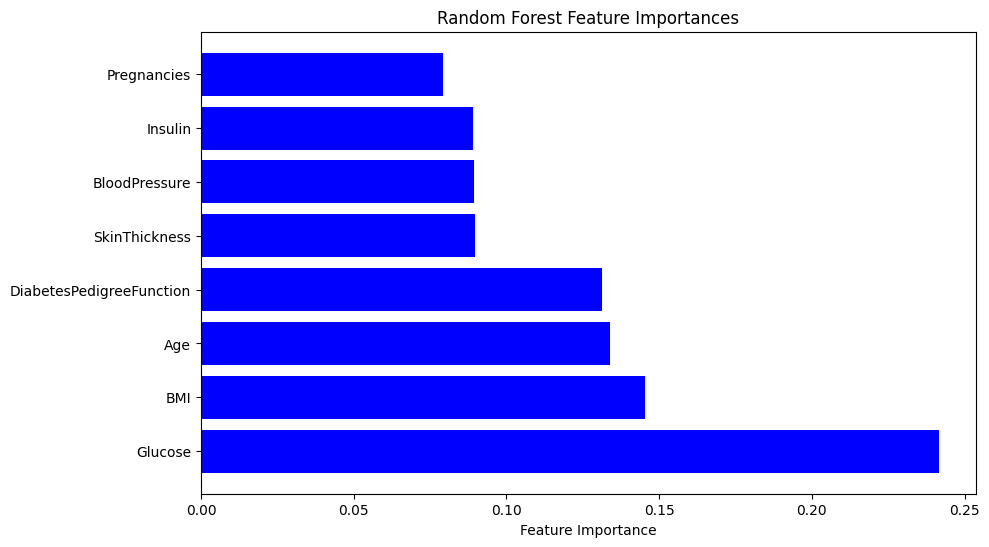

Accuracy: 77.73%


In [ ]:
# Fitting a random forest model
diabetes['Outcome'] = diabetes['Outcome'].astype('str')
X_train = diabetes_train[features]
y_train = diabetes_train['Outcome']

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Printing the model summary
print(rf_model)

# Plotting feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

# Predicting on the test set
diabetes_test['predicted_rf_outcome'] = rf_model.predict(X_test)
accuracy = accuracy_score(diabetes_test['Outcome'], diabetes_test['predicted_rf_outcome'])
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
# Calculate root mean squared error
error = diabetes_test['Outcome'].astype('int') - diabetes_test['predicted_rf_outcome'].astype('int')
rmse = np.sqrt(mean_squared_error(diabetes_test['Outcome'], diabetes_test['predicted_rf_outcome']))
print(f"Root Mean Square Error: {rmse:.2f}")

Root Mean Square Error: 0.47


**Statistical Analysis:**

Splitting the dataset into two groups based on the "Outcome" column (diabetic and non-diabetic). Next, calculating the correlation matrix and plots the correlation heatmap. Then, identifying highly correlated features (with a correlation > 0.5).

In [ ]:
# Spliting the data based on Outcome
unhealthy = diabetes[diabetes['Outcome'] == 1][features]
healthy = diabetes[diabetes['Outcome'] == 0][features]

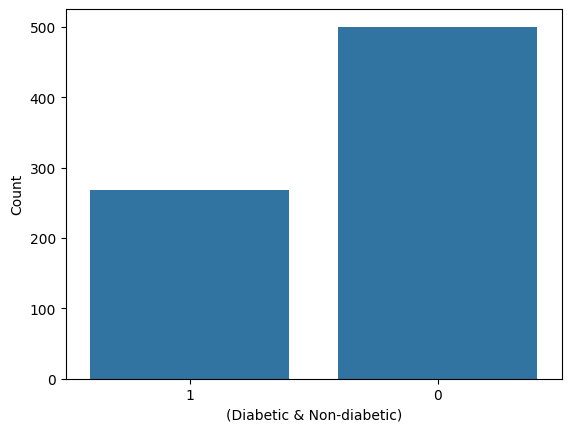

In [ ]:
sns.countplot(diabetes, x="Outcome")
plt.xlabel('(Diabetic & Non-diabetic)')
plt.ylabel('Count')
plt.show()

**Ranking Feature Importance and Risk Stratification:**

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Correlation Matrix (rounded to 2 decimal places):
                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.21           0.08   
Glucose                          0.13     1.00           0.22           0.19   
BloodPressure                    0.21     0.22           1.00           0.19   
SkinThickness                    0.08     0.19           0.19           1.00   
Insulin                          0.06     0.42           0.07           0.16   
BMI                              0.02     0.23           0.28           0.54   
DiabetesPedigreeFunction        -0.03     0.14          -0.00           0.10   
Age                              0.54     0.27           0.32           0.13   

                          Insulin   BMI  DiabetesPedigreeFunction   Age  
Pregnancies                  0.06  0.02                     -0.03  0.54  
Glucose                      0.42  0.23                      0.14  0.27  
BloodPr

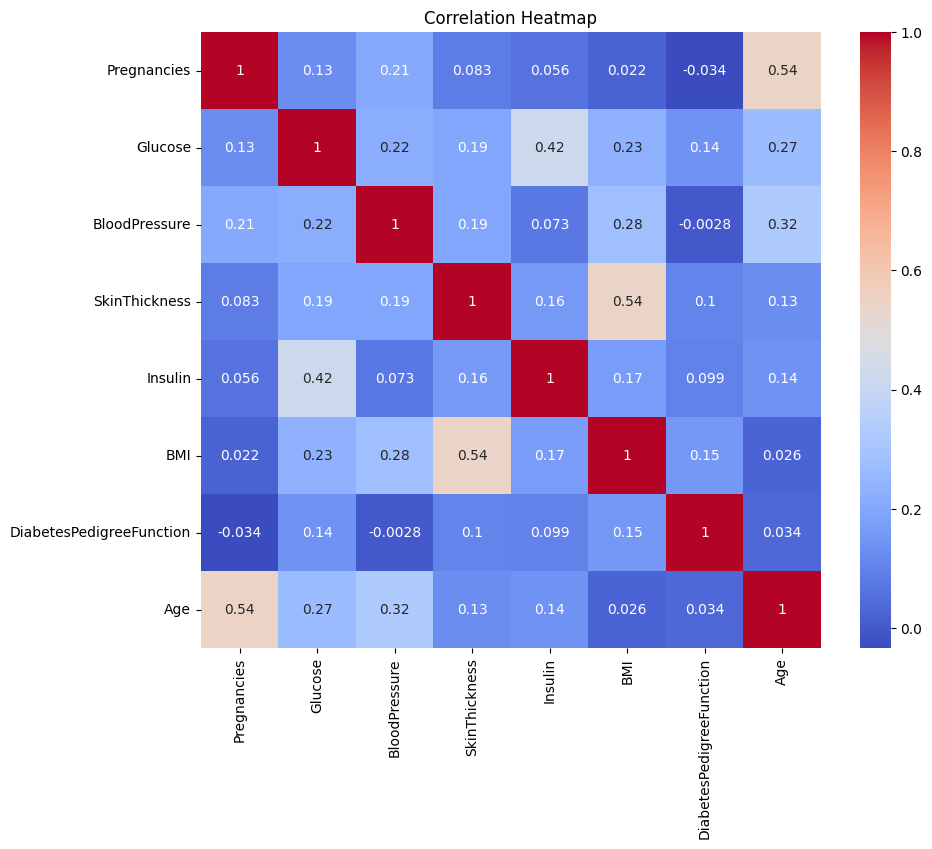

In [ ]:
# Calculating correlation matrix
corr_matrix = diabetes.iloc[:, :-1].corr()
print("Correlation Matrix (rounded to 2 decimal places):")
print(corr_matrix.round(2))

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Finding highly correlated features (correlation > 0.5)
highly_correlated_features = np.where(np.abs(corr_matrix) > 0.5)
highly_correlated_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*highly_correlated_features) if x != y and x < y]
print("\nHighly Correlated Features (correlation > 0.5):")
for pair in highly_correlated_pairs:
    print(pair)


Highly Correlated Features (correlation > 0.5):
('Pregnancies', 'Age')
('SkinThickness', 'BMI')


**Feature Importance and Visualization:**

Performing repeated stratified K-fold cross-validation. It scales the data using StandardScaler. It trains a Logistic Regression model on the scaled data.
It evaluates and prints the feature importance scores. The, visualizing the feature importance scores using a bar plot.

In [ ]:
# Setting random seed
np.random.seed(7)


In [ ]:
# Splitting data into features and target
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [ ]:
# Creating repeated stratified K-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Training the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_scaled, y)

# Evaluating feature importance
feature_importance = np.abs(logistic_model.coef_[0])
feature_names = X.columns

print("\nFeature Importance:")
for name, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{name}: {importance:.4f}")


Feature Importance:
Glucose: 1.1190
BMI: 0.6284
Pregnancies: 0.4142
DiabetesPedigreeFunction: 0.2835
Age: 0.1554
BloodPressure: 0.1008
Insulin: 0.0603
SkinThickness: 0.0350


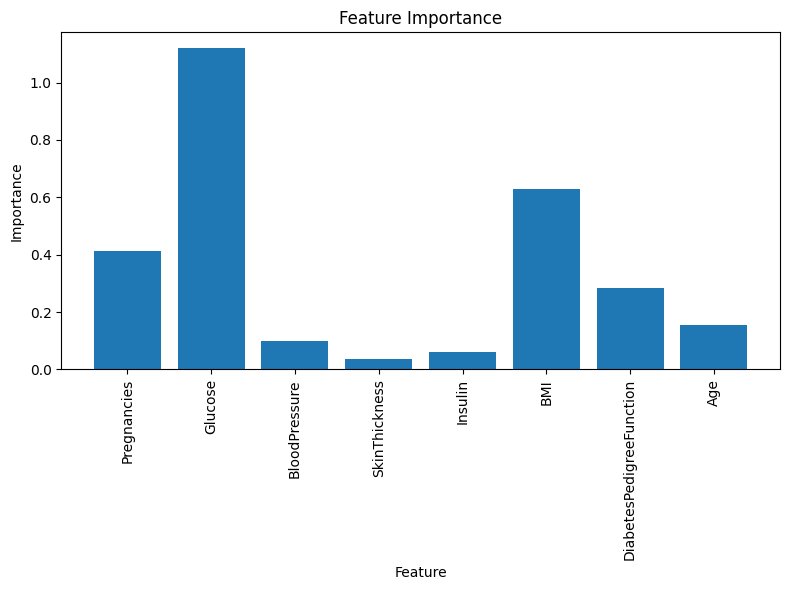

In [ ]:
# Plotting feature importance
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

**Result Interpretation:**

From the above analysis, we can confidently hypothesize that people with multiple pregnancies, higher levels of glucose, blood pressure, increased levels of BMI, diabetes pedigree function, skin thickness and people with lower levels of insulin are more prone to the risk of diabetes when compared to the people with the lower levels of these diagnostic variables of diabetes.

**Model Evaluation:**

Here, we are performing data preprocessing, outlier detection and removal, feature scaling, train-test split, logistic regression modeling, probability and class prediction, model evaluation using confusion matrices, and calculation of various performance metrics for the Pima Indian Diabetes dataset.

<Axes: >

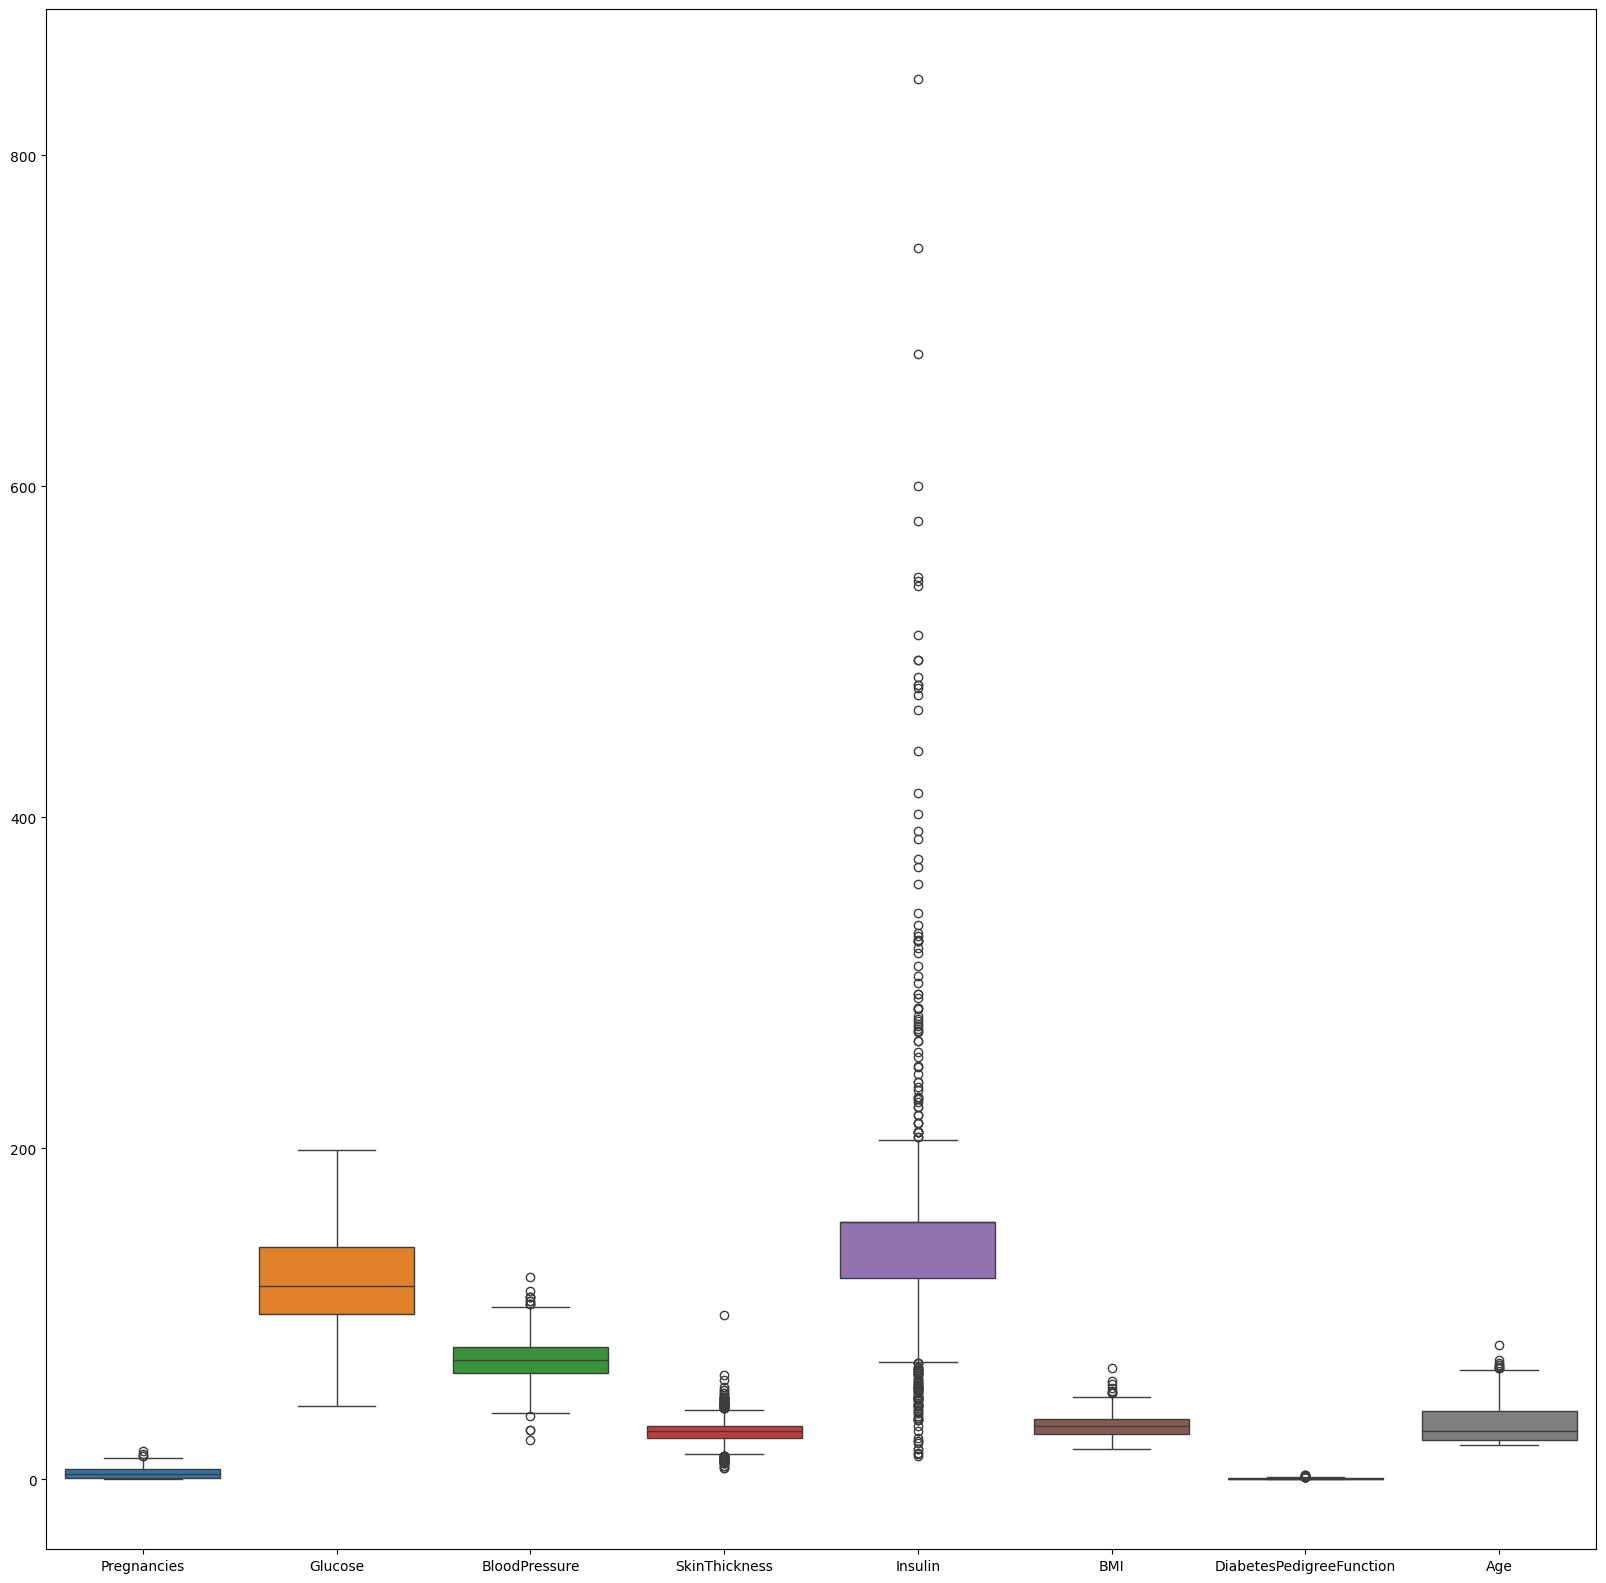

In [ ]:
# Plotting Boxplot
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = diabetes , ax = ax)

**Outlier Detection and Removal:**

Plotting a boxplot of the entire diabetes dataset to visualize the presence of outliers. Then, it selects a subset of the data (diabetes_new) by filtering out rows with insulin values above the 70th percentile.

In [ ]:
q = diabetes['Insulin'].quantile(.70)
diabetes_new = diabetes[diabetes['Insulin'] < q]

In [ ]:
diabetes_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
24,11,143.0,94.0,33.0,146.0,36.6,0.254,51,1
...,...,...,...,...,...,...,...,...,...
747,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0
751,1,121.0,78.0,39.0,74.0,39.0,0.261,28,0
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0


<Axes: >

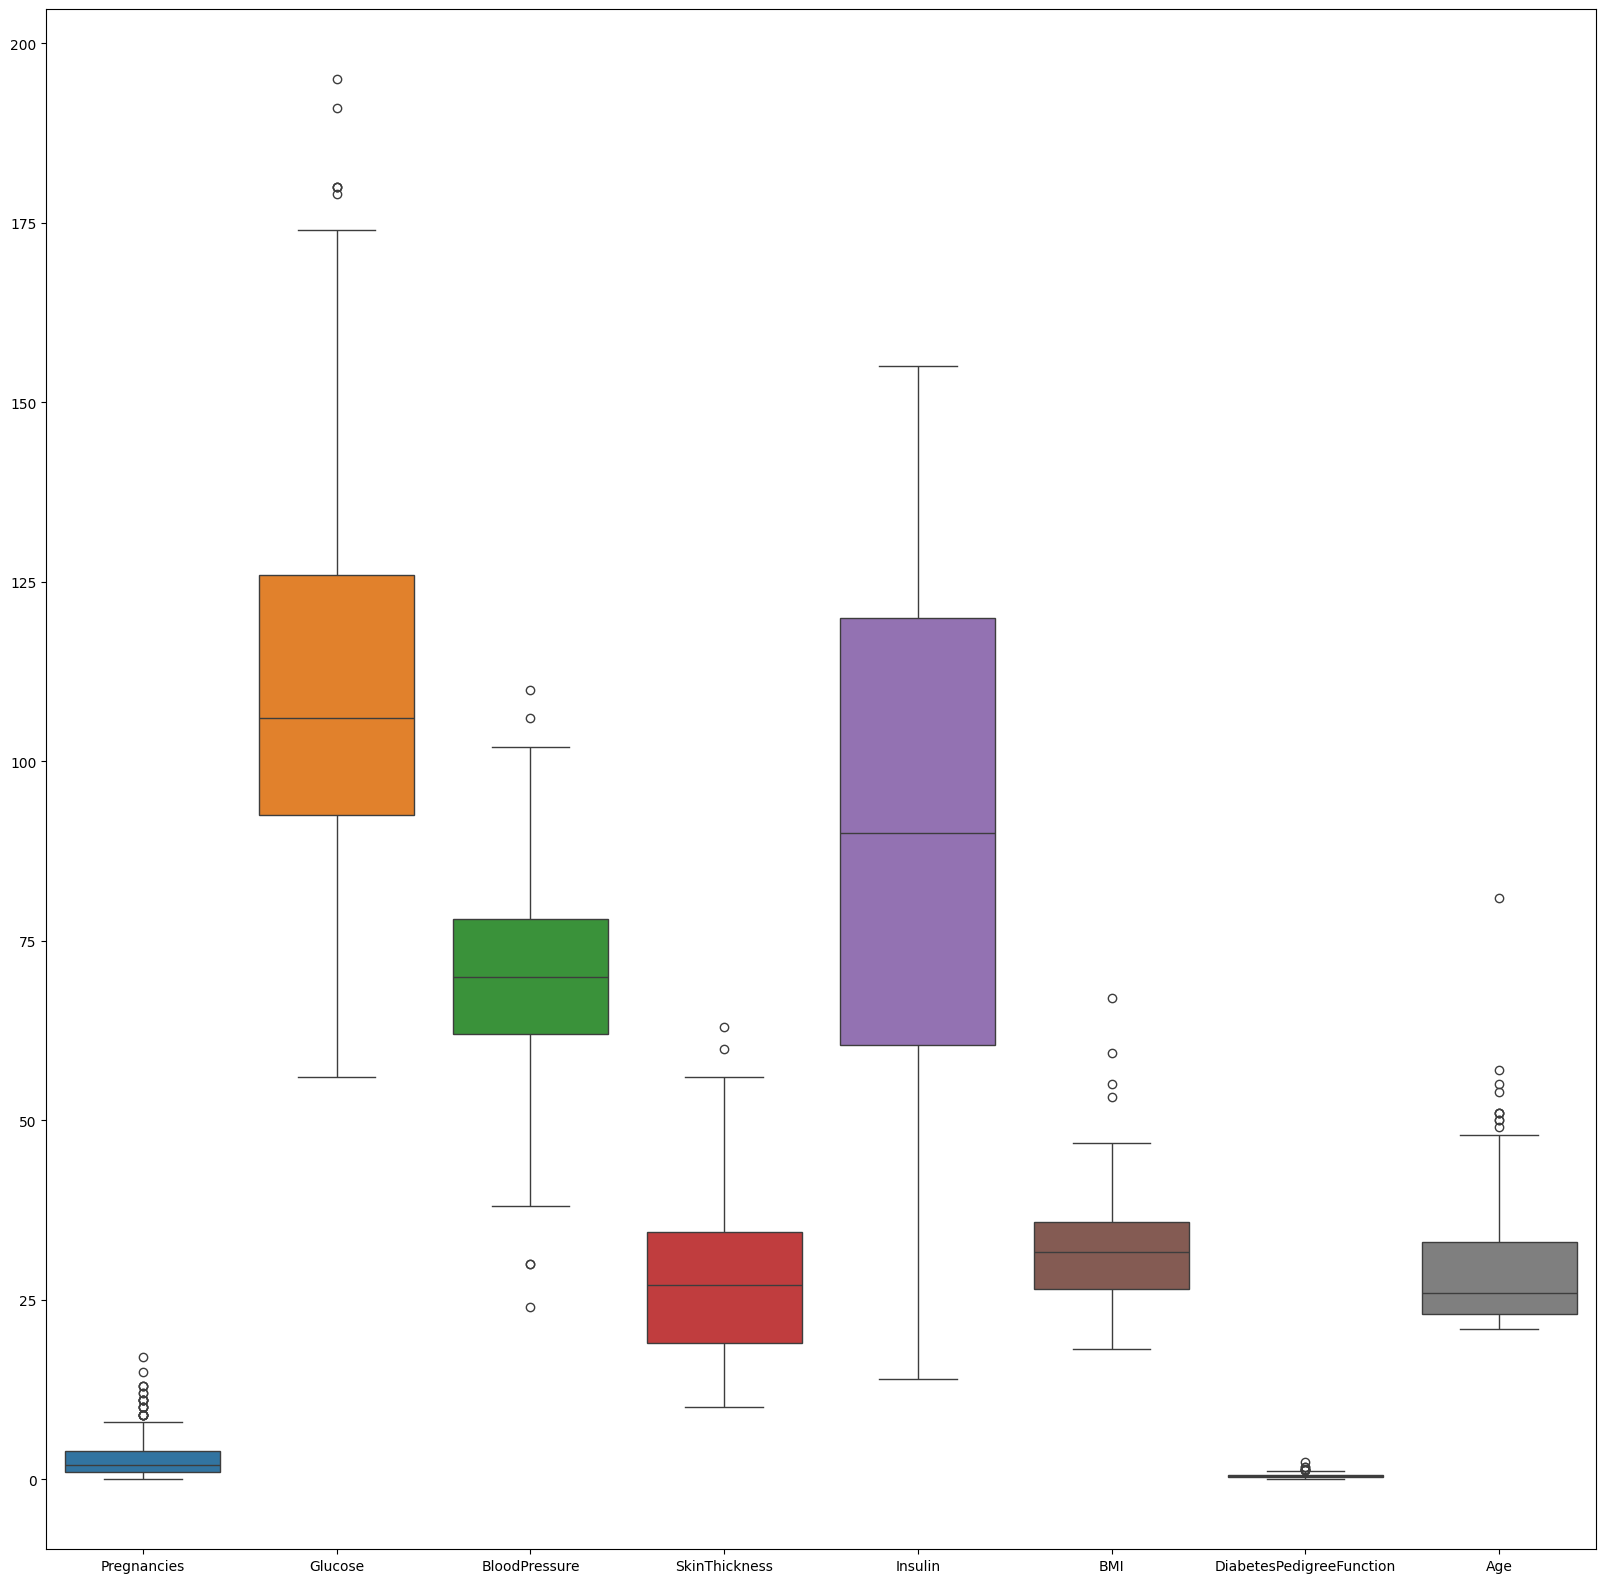

In [ ]:
# Plotting Boxplot
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = diabetes_new , ax = ax)

Next, performing quartile-based outlier detection and removal for various features in the dataset, such as Pregnancies, BMI, SkinThickness, Insulin, DiabetesPedigreeFunction, and Age. It calculates the upper and lower limits based on the interquartile range (IQR) and removes data points outside these limits as outliers.

In [ ]:
q = diabetes_new['Pregnancies'].quantile(.98)
diabetes_new = diabetes[diabetes['Pregnancies'] < q]

q = diabetes_new['BMI'].quantile(.99)
diabetes_new = diabetes_new[diabetes_new['BMI']< q]

q = diabetes_new['SkinThickness'].quantile(.99)
diabetes_new = diabetes_new[diabetes_new['SkinThickness']< q]

q = diabetes_new['Insulin'].quantile(.95)
diabetes_new = diabetes_new[diabetes_new['Insulin']< q]

q = diabetes_new['DiabetesPedigreeFunction'].quantile(.99)
diabetes_new = diabetes_new[diabetes_new['DiabetesPedigreeFunction']< q]


q = diabetes_new['Age'].quantile(.99)
diabetes_new = diabetes_new[diabetes_new['Age']< q]

**Outlier Removal Function:**

Defining a function outlier_removal that takes a DataFrame as input and removes outliers based on the IQR method. It calculates the upper and lower limits for each non-integer column and replaces values outside these limits with NaN (missing values).

In [ ]:
# Removing the outliers
def outlier_removal(self,data):
        def outlier_limits(col):
            Q3, Q1 = np.nanpercentile(col, [75,25])
            IQR= Q3-Q1
            UL= Q3+1.5*IQR
            LL= Q1-1.5*IQR
            return UL, LL

        for column in data.columns:
            if data[column].dtype != 'int64':
                UL, LL= outlier_limits(data[column])
                data[column]= np.where((data[column] > UL) | (data[column] < LL), np.nan, data[column])

        return data


**Data Visualization:**

In [ ]:
diabetes_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


<Axes: >

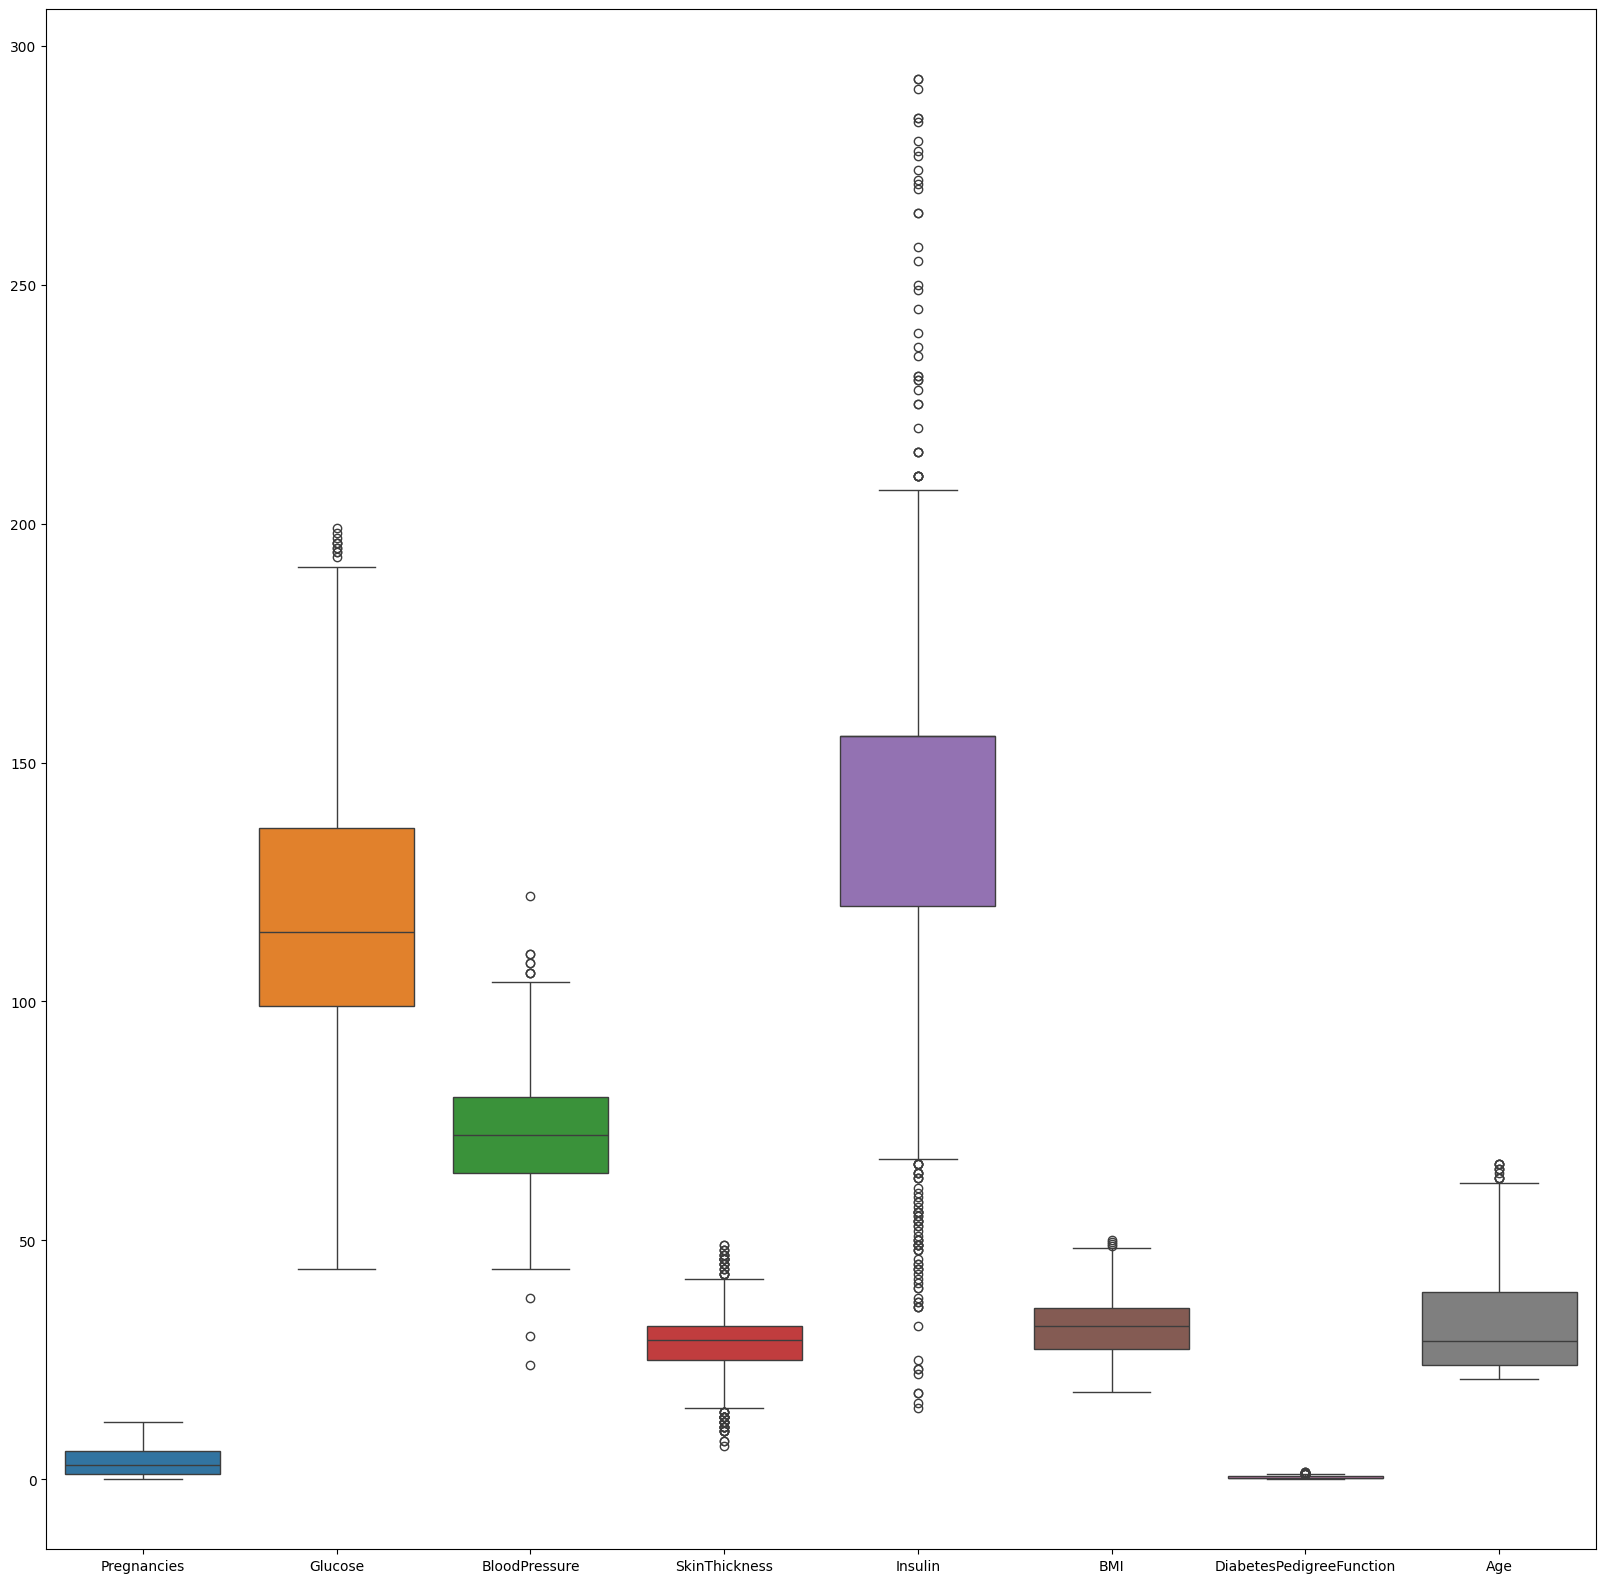

In [ ]:
# Plotting Boxplot
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = diabetes_new , ax = ax)

<Axes: >

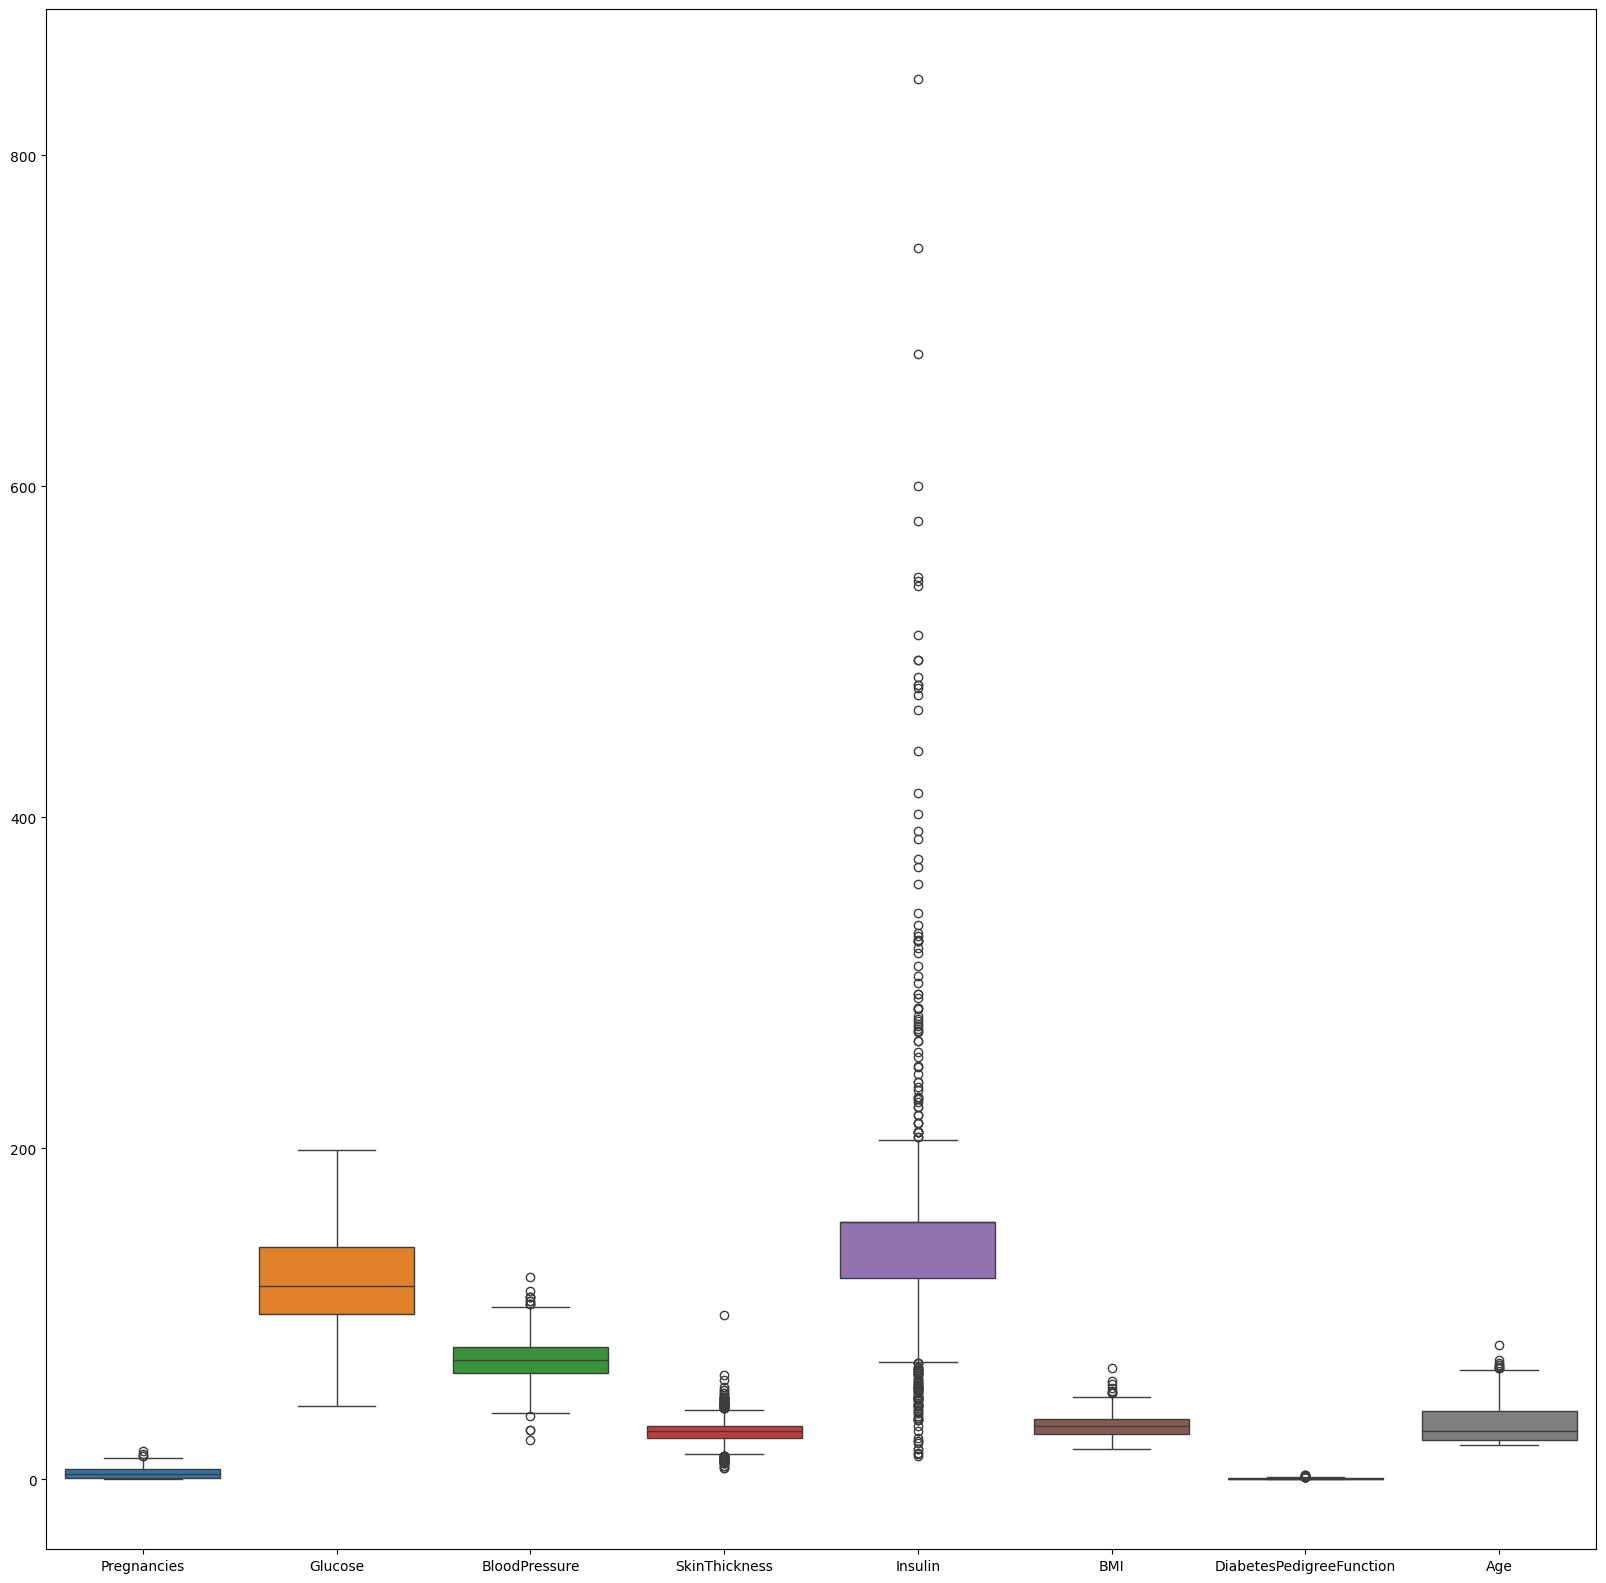

In [ ]:
# Plotting Boxplot
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = diabetes , ax = ax)

**Target Variable Extraction:**

After outlier removal, seperating the target variable (Outcome) from the diabetes_new DataFrame and stores it in the variable y.

In [ ]:
y = diabetes_new['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 684, dtype: object

In [ ]:
X = diabetes_new.drop(columns=['Outcome'])

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


**Feature Scaling:**

Creating a copy of the diabetes_new DataFrame (diabetes_scaled) and scales the numerical columns using the StandardScaler from scikit-learn. This step ensures that all features are on a similar scale, which can improve the performance of certain machine learning algorithms.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Creating a copy of the diabetes_new DataFrame
diabetes_scaled = diabetes_new.copy()

# Creating a scaler object
scaler = StandardScaler()

# Scaling the numerical columns in the DataFrame
numerical_cols = diabetes_scaled.select_dtypes(include=['float64', 'int64']).columns
diabetes_scaled[numerical_cols] = scaler.fit_transform(diabetes_scaled[numerical_cols])

# Checking the scaled data
print(diabetes_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.737468  0.982062      -0.017199       0.840252  0.309991  0.263391   
1    -0.863891 -1.169873      -0.525139       0.071975  0.309991 -0.835160   
2     1.378012  2.177582      -0.694452       0.091619  0.309991 -1.353048   
3    -0.863891 -1.033242      -0.525139      -0.696303 -0.982302 -0.599756   
5     0.417196 -0.110984       0.152114       0.091619  0.309991 -0.992095   

   DiabetesPedigreeFunction       Age Outcome  
0                  0.625138  1.581307       1  
1                 -0.340244 -0.144914       0  
2                  0.782538 -0.054061       1  
3                 -0.983833 -1.053452       0  
5                 -0.864909 -0.235768       0  


<Axes: >

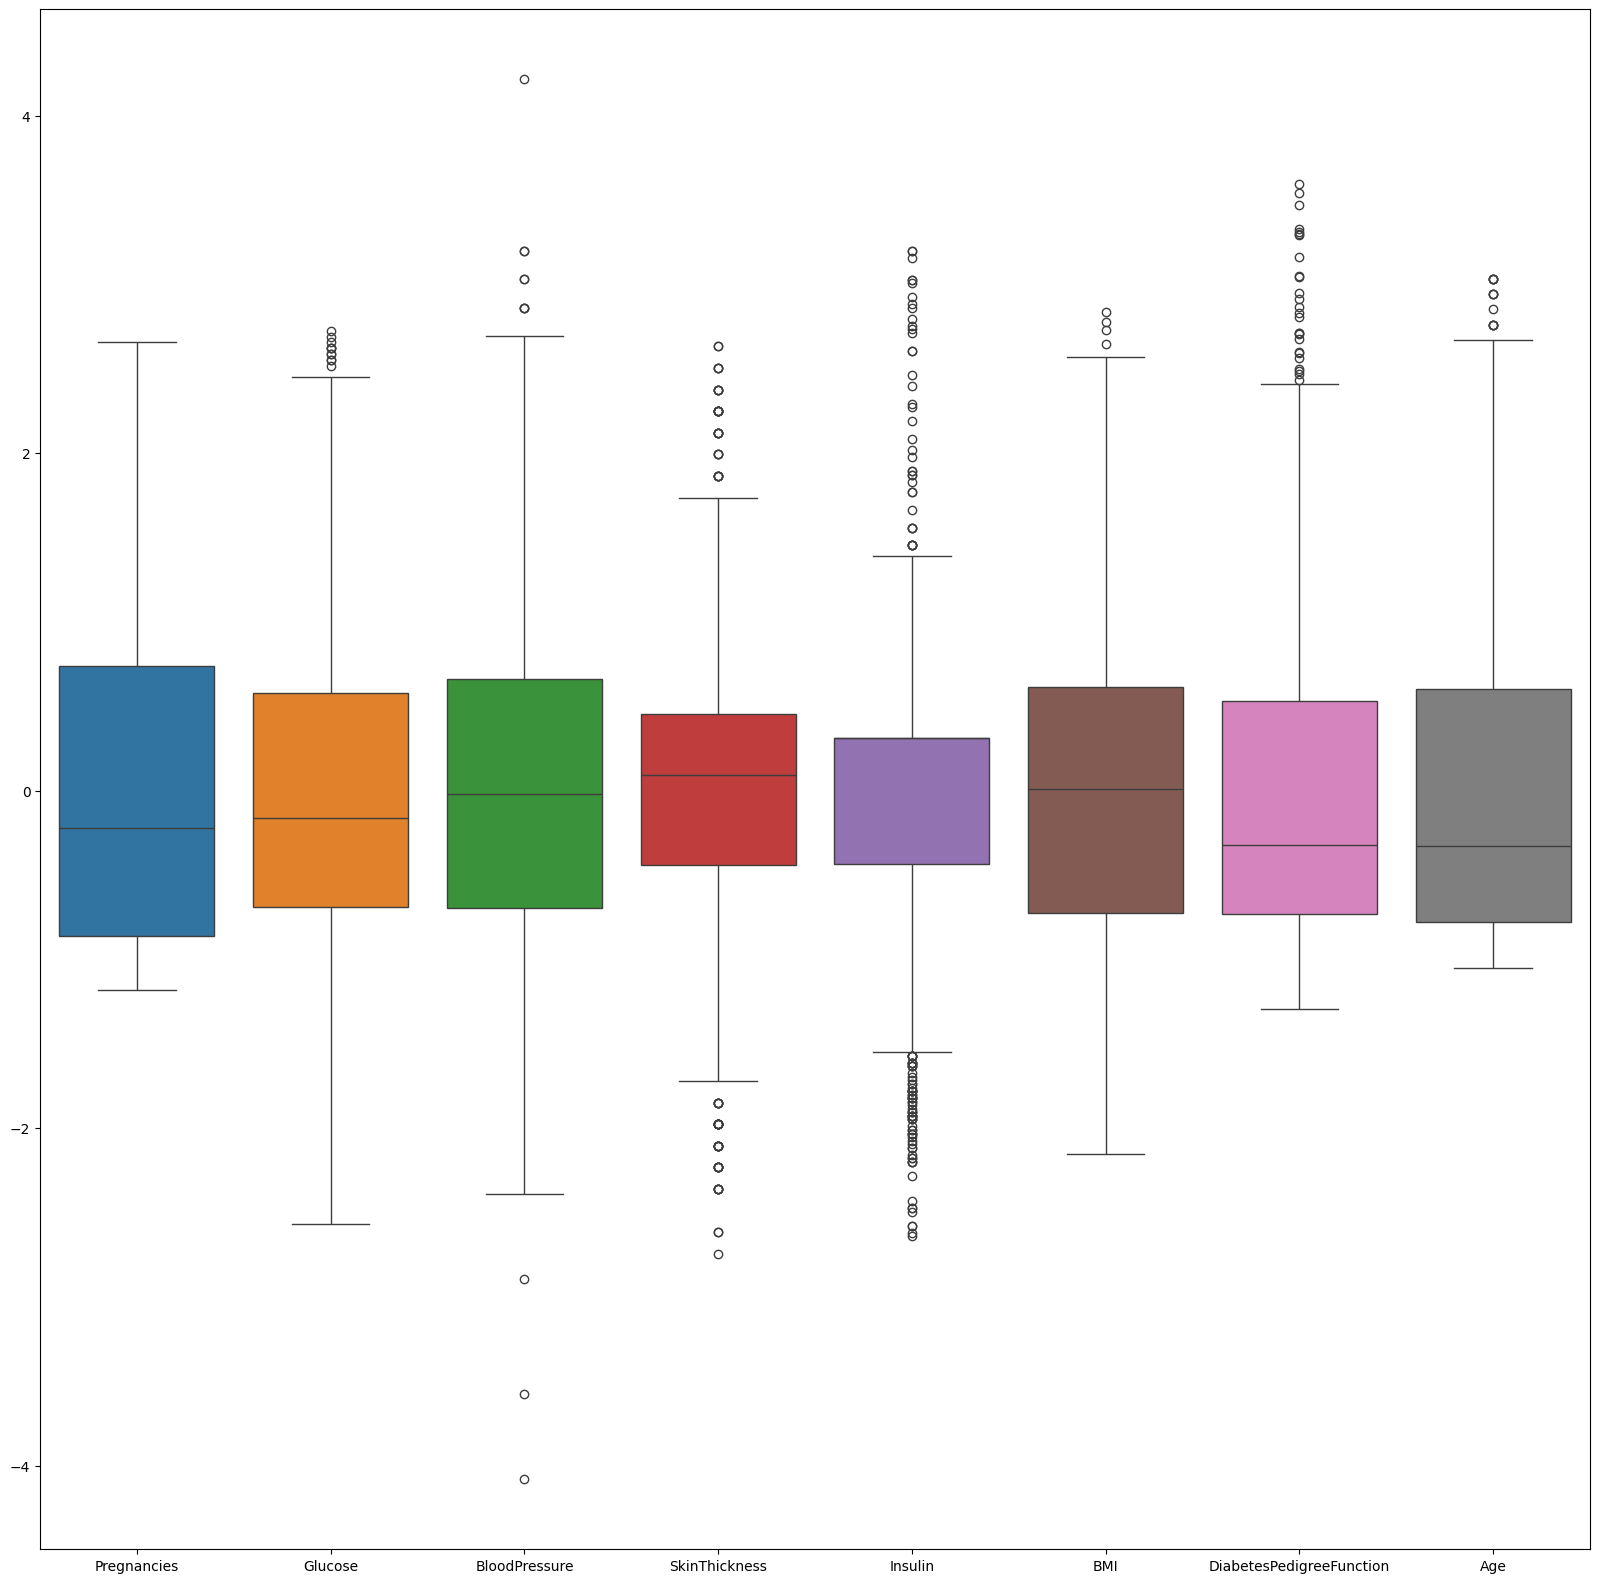

In [ ]:
# Plotting Boxplot
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = diabetes_scaled, ax = ax)

In [ ]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 684, dtype: object

**Train-Test Split:**

Splitting the scaled diabetes_scaled DataFrame and the target variable y into training and test sets using train_test_split from scikit-learn. The test size is set to 20% of the data, and a random state is specified for reproducibility.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_scaled , y , test_size = .20 , random_state = 144)

In [ ]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
456,-0.863891,0.538012,-1.541017,0.091619,0.309991,-0.819466,0.835004,2.671552,0
702,-0.863891,1.665216,1.337305,0.071975,0.309991,0.483102,1.597516,1.763015,1
60,-0.543619,-1.204031,0.017102,0.091619,0.309991,0.084086,-0.504639,-1.053452,0
97,-0.863891,-1.648081,-2.048956,-1.336534,-1.360237,-1.808162,-0.438182,-0.962598,0
361,0.417196,1.323639,-0.186512,0.091619,0.309991,-0.332965,-0.843922,2.762406,0
...,...,...,...,...,...,...,...,...,...
725,0.096924,-0.247615,0.490740,1.480484,0.309991,1.173619,-0.742487,0.491062,0
478,1.378012,0.230593,0.152114,1.224391,-1.381234,-0.945015,-1.001322,0.581916,0
246,2.018555,0.093962,-0.355826,0.091619,0.309991,-0.113255,-0.665536,0.763623,0
503,1.057740,-0.862454,-0.694452,-0.440211,-1.297248,0.216311,1.013390,0.763623,0


In [ ]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
751,-0.863891,0.059804,0.490740,1.352437,-1.402230,1.110845,-0.655043,-0.417476,0
47,-0.543619,-1.648081,-0.186512,-0.184118,0.309991,-0.615449,0.481730,-0.962598,0
396,-0.223347,-0.794138,-1.371704,0.712206,-0.541377,-1.133338,1.733929,0.581916,0
515,-0.223347,1.494428,-0.186512,-1.336534,-0.751341,-0.050480,-0.630559,-0.417476,1
644,-0.223347,-0.555034,-0.017199,0.200021,0.235491,-0.678224,0.985408,-0.508329,0
...,...,...,...,...,...,...,...,...,...
71,0.417196,0.674643,-0.694452,0.840252,-0.016466,-0.521288,-0.130379,-0.599183,0
42,1.057740,-0.452561,1.675931,-1.336534,0.309991,-1.447209,-0.745985,1.399600,0
682,-1.184163,-0.828296,-0.694452,1.352437,-0.751341,1.989686,-0.287778,-0.962598,0
87,-0.543619,-0.657507,-0.355826,-0.440211,-1.465219,1.032377,-0.434684,-0.599183,0


In [ ]:
# Printing the first row
print("First row of x_test:")
print(x_test.iloc[0])

First row of x_test:
Pregnancies                -0.863891
Glucose                     0.059804
BloodPressure                0.49074
SkinThickness               1.352437
Insulin                     -1.40223
BMI                         1.110845
DiabetesPedigreeFunction   -0.655043
Age                        -0.417476
Outcome                            0
Name: 751, dtype: object


**Checking if the Diabetes dataset contains any false positives or false negatives when tested with a linear classification and default prediction labels:**


**Logistic Regression Model:**

Creating a LogisticRegression object with the 'liblinear' solver and fits the model to the training data (x_train, y_train).

In [ ]:
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [ ]:
logr_liblinear.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

**Probability and Class Prediction:**

Predicting the probability and class for the first row of the test data (x_test) using the fitted logistic regression model. It prints the predicted probability and class for this instance.

In [ ]:
import numpy as np

# Predicting the probability of the first row in x_test
predicted_proba = logr_liblinear.predict_proba(np.array(x_test.iloc[1]).reshape(1, -1))


# Printing the predicted probability
print("Predicted probability:", predicted_proba)

# Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

Predicted probability: [[0.9888655 0.0111345]]


In [ ]:
# Predicting the class of the first row in x_test
predicted_class = logr_liblinear.predict(np.array(x_test.iloc[1]).reshape(1, -1))

# Printing the predicted class
print("Predicted class:", predicted_class)

# Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

Predicted class: ['0']


In [ ]:
logr_liblinear.predict_log_proba(np.array(x_test.iloc[1]).reshape(1, -1))

# Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

**Checking Target Variable Type:**

Checking the type of the target variable (y_test) and prints the value of the second instance in y_test.

In [ ]:
type(y_test)

# Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y_test.iloc[1]

'0'

In [ ]:
y_test

751    0
47     0
396    0
515    1
644    0
      ..
71     0
42     0
682    0
87     0
3      0
Name: Outcome, Length: 137, dtype: object

**Default Logistic Regression Model:**

Now, I am creating another LogisticRegression object with default settings and fits it to the training data.

In [ ]:
logr = LogisticRegression(verbose=1)

In [ ]:
logr.fit(x_train,y_train)

LogisticRegression(verbose=1)

In [ ]:
logr_liblinear

LogisticRegression(solver='liblinear', verbose=1)

In [ ]:
logr

LogisticRegression(verbose=1)

**Feature Consistency Check:**

Checking if the training and test data have the same features. If there are any missing features in either set, it adds those features to the training data with a value of 0 and refits the logr_liblinear model.

In [ ]:
# Checking if the test data has the same features as the training data
missing_features_train = set(x_test.columns) - set(x_train.columns)
missing_features_test = set(x_train.columns) - set(x_test.columns)

# Adding the missing features to the training data
for feature in missing_features_train:
    x_train[feature] = 0

# Fitting the model on the training data
logr_liblinear.fit(x_train, y_train)

# Removing the new features from the test data
x_test_reduced = x_test[x_train.columns]

# Predicting the labels for the test data
y_pred_liblinear = logr_liblinear.predict(x_test_reduced)
y_pred_liblinear


[LibLinear]

array(['0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0',
       '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0',
       '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0',
       '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1',
       '0', '1', '0', '0', '0', '0', '0'], dtype=object)

In [ ]:
# Checking if the test data has the same features as the training data
missing_features_train = set(x_test.columns) - set(x_train.columns)
missing_features_test = set(x_train.columns) - set(x_test.columns)

# Adding the missing features to the training data
for feature in missing_features_train:
    x_train[feature] = 0

# Fitting the model on the training data
logr_liblinear.fit(x_train, y_train)

# Removing the new features from the test data
x_test_reduced = x_test[x_train.columns]

# Predicting the labels for the test data
y_pred_default = logr.predict(x_test_reduced)
y_pred_default

[LibLinear]

array(['0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0',
       '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0',
       '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0',
       '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1',
       '0', '1', '0', '0', '0', '0', '0'], dtype=object)

**Prediction and Confusion Matrix:**

Predicting the labels for the test data using both the logr_liblinear and logr models and stores the predictions in y_pred_liblinear and y_pred_default, respectively. Then, calculating and plotting the confusion matrices for both sets of predictions.

Confusion Matrix for y_pred_liblinear:
[[88  0]
 [ 0 49]]


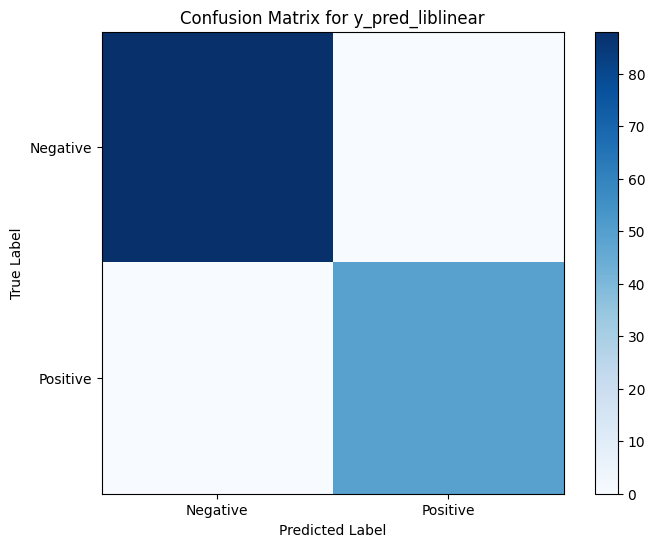


Confusion Matrix for y_pred_default:
[[88  0]
 [ 0 49]]


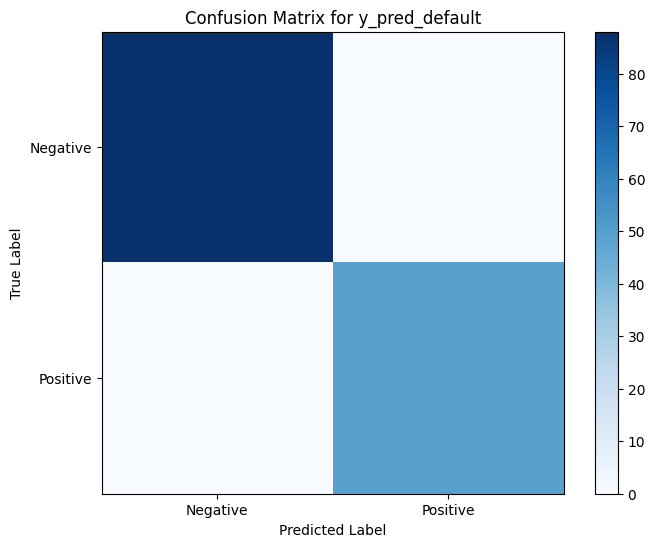

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion matrix for y_pred_liblinear
cm_liblinear = confusion_matrix(y_test, y_pred_liblinear)
print("Confusion Matrix for y_pred_liblinear:")
print(cm_liblinear)

# Plotting the confusion matrix for y_pred_liblinear
plt.figure(figsize=(8, 6))
plt.imshow(cm_liblinear, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(range(2), ['Negative', 'Positive'])
plt.yticks(range(2), ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for y_pred_liblinear')
plt.show()

# Confusion matrix for y_pred_default
cm_default = confusion_matrix(y_test, y_pred_default)
print("\nConfusion Matrix for y_pred_default:")
print(cm_default)

# Plotting the confusion matrix for y_pred_default
plt.figure(figsize=(8, 6))
plt.imshow(cm_default, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(range(2), ['Negative', 'Positive'])
plt.yticks(range(2), ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for y_pred_default')
plt.show()

**Model Evaluation Metrics:**

Finally, calculating various evaluation metrics, such as accuracy, F1-score, precision, recall, and specificity, for both y_pred_liblinear and y_pred_default predictions. Then, printing these scores for each set of predictions.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Getting the unique labels in y_test
unique_labels = np.unique(y_test)

# Checking if the labels are 0 and 1 (or strings '0' and '1')
if np.array_equal(unique_labels, [0, 1]) or np.array_equal(unique_labels, ['0', '1']):
    pos_label = '1'
else:
    pos_label = unique_labels[1]  # Assuming the positive label is the second unique value

# Printing the y_pred_liblinear scores
print("Scores for y_pred_liblinear:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_liblinear))
print("F1 Score:", f1_score(y_test, y_pred_liblinear, pos_label=pos_label))
print("Precision Score:", precision_score(y_test, y_pred_liblinear, pos_label=pos_label))
print("Recall Score:", recall_score(y_test, y_pred_liblinear, pos_label=pos_label))

# Calculating Specificity score for y_pred_liblinear
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_liblinear).ravel()
specificity_liblinear = tn / (tn + fp)
print("Specificity Score:", specificity_liblinear)

print("\n")  # Printing a blank line for better readability

# Printing the y_pred_default scores
print("Scores for y_pred_default:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_default))
print("F1 Score:", f1_score(y_test, y_pred_default, pos_label=pos_label))
print("Precision Score:", precision_score(y_test, y_pred_default, pos_label=pos_label))
print("Recall Score:", recall_score(y_test, y_pred_default, pos_label=pos_label))

# Calculating Specificity score for y_pred_default
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_default).ravel()
specificity_default = tn / (tn + fp)
print("Specificity Score:", specificity_default)

Scores for y_pred_liblinear:
Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Specificity Score: 1.0


Scores for y_pred_default:
Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Specificity Score: 1.0
